In [8]:
import pandas as pd
import numpy as np


# Load the dataset
df = pd.read_csv('diabetes_dataset.csv')

# Convert inf values to NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [2]:
# Describe the dataset
desc = df.describe()
min_values = df.min()
max_values = df.max()
median_values = df.median()

print("Description:\n", desc)
print("Minimum Values:\n", min_values)
print("Maximum Values:\n", max_values)
print("Median Values:\n", median_values)


Description:
        PatientID     Glucose  BloodPressure     Insulin        BMI        Age  \
count   20.00000   20.000000      20.000000   20.000000  20.000000  20.000000   
mean    10.50000  120.350000      70.100000   36.650000  31.245000  28.450000   
std      5.91608   28.137398       8.668758   54.045084   5.706642   5.853249   
min      1.00000   78.000000      50.000000    0.000000  23.300000  21.000000   
25%      5.75000  100.000000      64.000000    0.000000  27.625000  23.750000   
50%     10.50000  120.000000      70.000000    0.000000  29.650000  27.500000   
75%     15.25000  138.750000      76.500000   62.500000  33.700000  32.250000   
max     20.00000  183.000000      88.000000  168.000000  45.000000  41.000000   

        Diabetes  
count  20.000000  
mean    0.600000  
std     0.502625  
min     0.000000  
25%     0.000000  
50%     1.000000  
75%     1.000000  
max     1.000000  
Minimum Values:
 PatientID         1.0
Glucose          78.0
BloodPressure    50.0
In

In [3]:
# Fill rate and count
fill_rate = df.notnull().mean() * 100
count = df.count()

print("Fill Rate (%):\n", fill_rate)
print("Count:\n", count)


Fill Rate (%):
 PatientID        100.0
Glucose          100.0
BloodPressure    100.0
Insulin          100.0
BMI              100.0
Age              100.0
Diabetes         100.0
dtype: float64
Count:
 PatientID        20
Glucose          20
BloodPressure    20
Insulin          20
BMI              20
Age              20
Diabetes         20
dtype: int64


C:\Users\aniksa.lukose\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


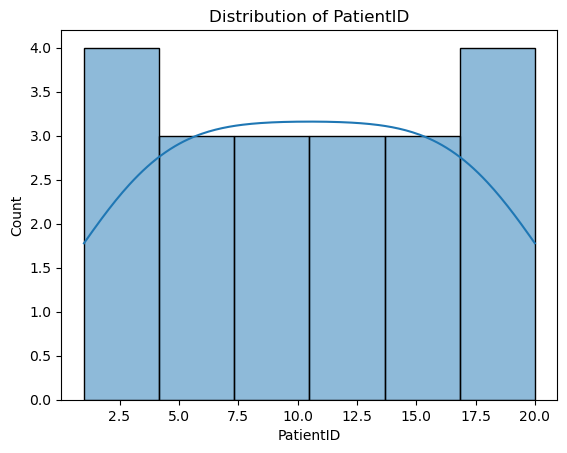

C:\Users\aniksa.lukose\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


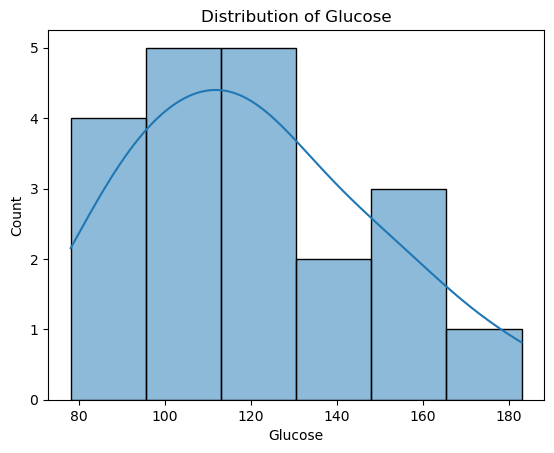

C:\Users\aniksa.lukose\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


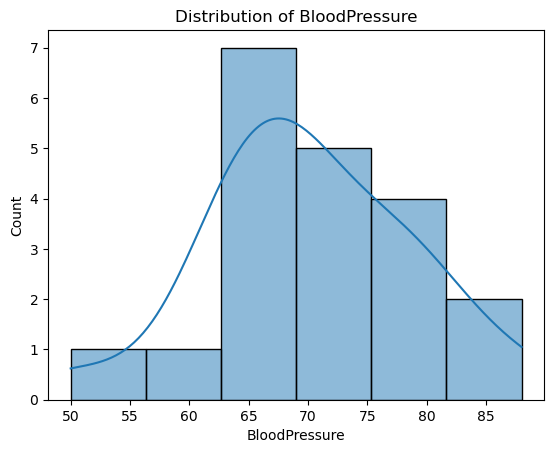

C:\Users\aniksa.lukose\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


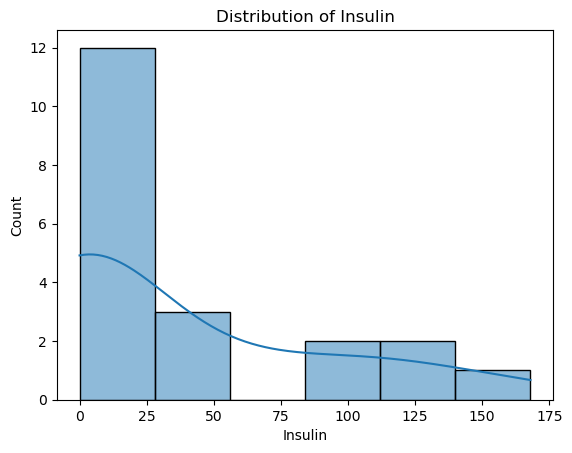

C:\Users\aniksa.lukose\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


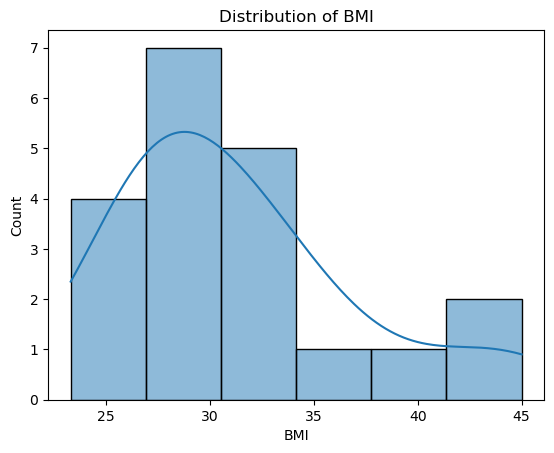

C:\Users\aniksa.lukose\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


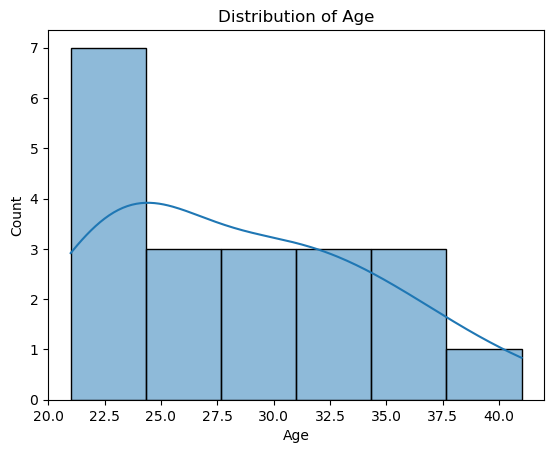

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution charts for each independent variable
for col in df.columns[:-1]:  # Assuming the last column is the target variable
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


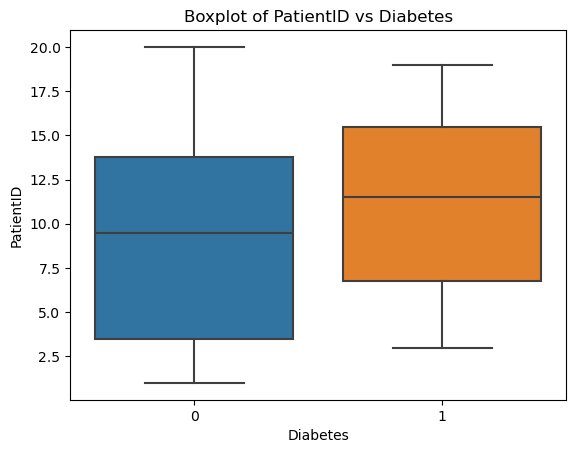

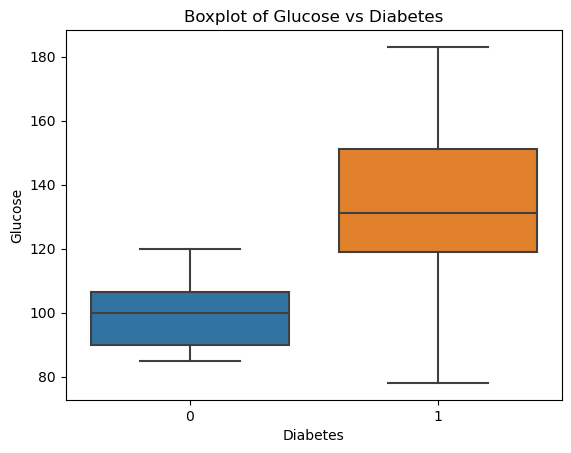

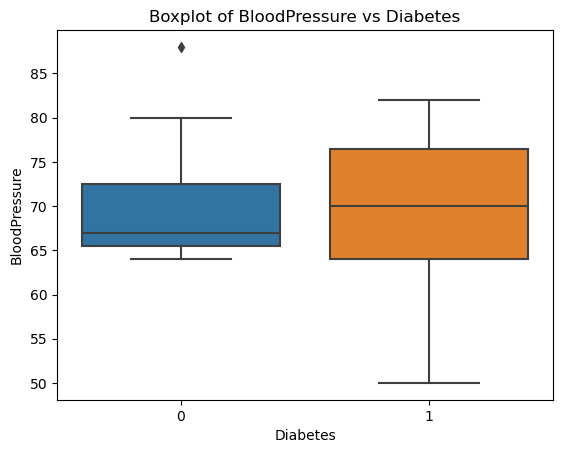

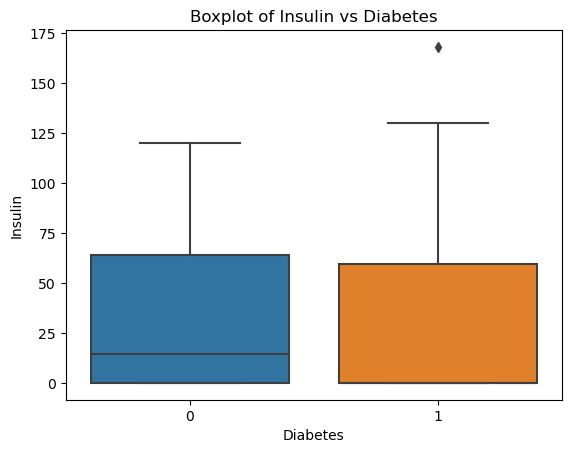

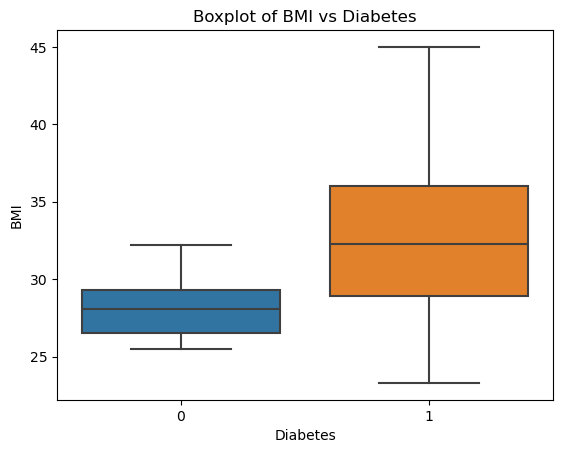

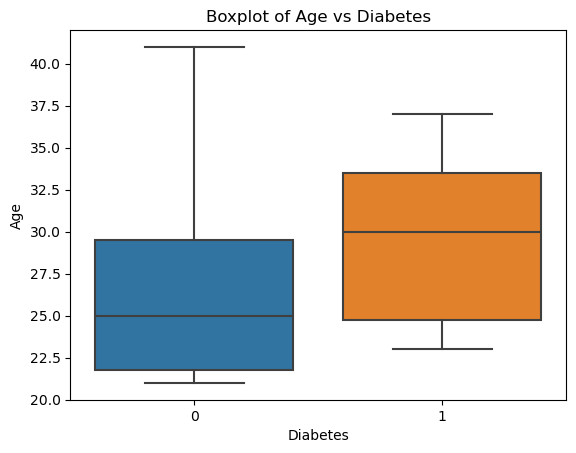

In [5]:
# Boxplots for each independent variable against the target variable
target_variable = df.columns[-1]  # Assuming the last column is the target variable

for col in df.columns[:-1]:
    sns.boxplot(x=target_variable, y=col, data=df)
    plt.title(f'Boxplot of {col} vs {target_variable}')
    plt.show()


In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X = df.iloc[:, :-1]  # Assuming the last column is the target variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("VIF:\n", vif_data)


VIF:
          feature        VIF
0      PatientID   6.868333
1        Glucose  26.851227
2  BloodPressure  52.134111
3        Insulin   2.067196
4            BMI  39.409404
5            Age  29.346046


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('diabetes_dataset.csv')

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Fill missing values if any (example: filling with mean)
df.fillna(df.mean(), inplace=True)

# Define features and target variable
X = df.drop(['PatientID', 'Diabetes'], axis=1)
y = df['Diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred, zero_division=0))

# Find the best model
best_model_name = max(results, key=results.get)
best_model_accuracy = results[best_model_name]

print(f"Best Model: {best_model_name} with Accuracy: {best_model_accuracy}")


   PatientID  Glucose  BloodPressure  Insulin   BMI  Age  Diabetes
0          1       85             66       29  26.6   31         0
1          2       89             66       94  28.1   21         0
2          3       78             50       88  31.0   26         1
3          4      120             70       54  32.2   24         0
4          5      110             64      130  27.1   23         1
PatientID        0
Glucose          0
BloodPressure    0
Insulin          0
BMI              0
Age              0
Diabetes         0
dtype: int64
Logistic Regression Accuracy: 0.75
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

Random Forest Accuracy: 0.5
              precision    recall  f1-score   support

       